In [1]:
# Import required libraries

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
# Importing the Data                                                                       Shape

Endg_Truth = loadmat('end6_groundTruth.mat')      
Ground_Truth = loadmat('groundTruth.mat')               
Urban = loadmat('Urban_R162.mat')                 
image = Urban['Y'].T                                                                #    94249*162  
groundTruth = Ground_Truth ['groundTruth']                                          #     307*307
image_shape = (Ground_Truth ['nRow'], Ground_Truth ['nCol'], image.shape[1])


def hyper_to_2D(img):
    """
    
    Converts a 3D HSI cube (m x n x p) to a 2D matrix of points (N X p)
+   N = m*n, p := number of bands

    """
    img = np.array(img)
    ndim = img.ndim

    if ndim not in [2, 3]:
      raise "invalid dimention. ndim = 2 or 3"

    if ndim == 2:
      m, n = np.shape(img)
      
      hyper_img = np.empty((m,n,1))
      hyper_img[:,:,0] = img

      return hyper_to_2D(hyper_img).ravel()

    m, n, p = np.shape(img)
    N = n * m
    
    dataset = img.T.reshape((p, N)).T

    if p == 1:
      return dataset.ravel()
    
    return dataset

image = image
groundTruth = hyper_to_2D(groundTruth)


print(image.shape)
print(groundTruth.shape)


(94249, 162)
(94249,)


In [4]:
# Standardization

image = StandardScaler().fit_transform(image)


In [5]:
# Featuer extracion with pca

from sklearn.decomposition import PCA
image = PCA(n_components=40).fit_transform(image)

print(np.shape(image))

(94249, 40)


In [6]:
# Split into train (2/3) and test (1/3) sets

from sklearn.model_selection import train_test_split
seed = 40
X_train, X_test, y_train, y_test = train_test_split(image, groundTruth, test_size = 0.30 , train_size = 0.70 , random_state = seed , stratify=groundTruth)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(65974, 40)
(28275, 40)
(65974,)
(28275,)


In [6]:
from sklearn.neighbors import KNeighborsClassifier

for k in range(1,10):
    Model = KNeighborsClassifier(n_neighbors=k)
    Model = KNeighborsClassifier(n_neighbors = k)
    Model.fit(X_train, y_train)
    pred = Model.predict(X_test)
    acc_train = Model.score(X_train, y_train)
    acc_test= Model.score(X_test, y_test)
    print(f'k is = {k} , accuracy is =', acc_test, acc_train)

k is = 1 , accuracy is  0.8123076923076923 1.0
k is = 2 , accuracy is  0.8208311229000884 0.928350562342741
k is = 3 , accuracy is  0.8379133510167993 0.917209809925122
k is = 4 , accuracy is  0.838762157382847 0.9085397277715463
k is = 5 , accuracy is  0.8420512820512821 0.8982326370994634
k is = 6 , accuracy is  0.843395225464191 0.8957013368902901
k is = 7 , accuracy is  0.8423695844385499 0.886667475065935
k is = 8 , accuracy is  0.8427586206896551 0.886667475065935
k is = 9 , accuracy is  0.8430061892130858 0.880604480552945


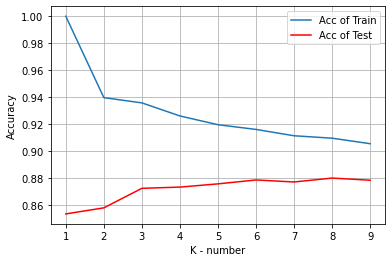

In [7]:
x1 = np.array([1, 2,3,4,5,6,7,8,9])
y1 = np.array([1.0, 0.9396,0.9357,0.9260, 0.9195,0.9160,0.9113,0.9095,0.9054])
x2 = np.array([1, 2,3,4,5,6,7,8,9])
y2 = np.array([0.8533,0.8578,0.8723, 0.8732,0.8756,0.8785,0.8770,0.8799,0.8783])
plt.plot(x1, y1, x2, y2,"r")

plt.xlabel('K - number')
plt.ylabel('Accuracy')
plt.legend(['Acc of Train', 'Acc of Test']);
plt.grid()
plt.show()